# iCCD Data Preparation - Template

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import iCCD_dataprep as pl
import pandas as pd

In [2]:
# Helpful Identifiers you may have in file names
series = 'TC5' #eg Triple Cation 5
sample = 'FILM' #Eg FILM, CRYSTAL, POWDER, Transport Layer
fluence = '250uW' #Power
date = '3004' #Date

In [3]:
fluences = pl.calc_fluences(P=[25,250],wl=532,d=240,a=1003,b=1788,areaType='elliptical',save=False,filename=series+'_'+date)


               Parameters                                           Values
0          Measured Power                                        [25, 250]
1              Absorption                                              0.9
2         Spot Area/ cm^2                                   1408504.791903
3    Sample Thickness/ nm                                              240
4     Pump Wavelength/ nm                                              532
5  Carrier Density/ cm^-3         [1782549176.0832937, 17825491760.832935]
6   Power Fluence/ uJcm-2  [1.7749318386216668e-11, 1.774931838621667e-10]
7  Energy Fluence/ nJcm-2  [1.774931838621667e-05, 0.00017749318386216668]


   t_start     dt   n  t_end  t_next  t_real
0     1.75  0.005  27  1.885   1.845   0.135
1     1.84  0.020  15  2.140   2.050   0.300
2     1.99  0.060  11  2.650   2.452   0.660
3     2.35  0.120   8  3.310   3.022   0.960


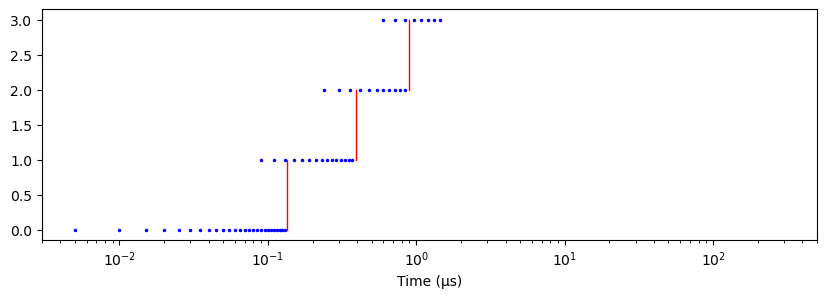

In [4]:
t0 = 1.750 # Starting time (time at peak of PL)

r0 = pl.one_window(t0, 0.005,27) # First time point, date width, number of points, starting time of whole experiment
r1 = pl.one_window(1.84, 0.02, 15)
r2 = pl.one_window(1.990, 0.06, 11)
r3 = pl.one_window(2.35, 0.12, 8)
#r4 = pl.one_window(2.5, .1, 15)
#r5 = pl.one_window(3., .4, 10)
#r6 = pl.one_window(6.2, 1.4, 6)
# r7 = pl.one_window(13.7, 4, 5)
# r8 = pl.one_window(11, 2, 5)

tdf = pd.DataFrame([r0,r1,r2,r3],columns = ['t_start','dt','n','t_end','t_next','t_real']) #Creates a dataframe with the time windows
pl.timesplot(tdf, t0) #Plots the time windows
print(tdf)

In [5]:
files = [file for file in os.listdir() if file.endswith('sig.asc') and file.startswith(sample) and fluence in file] # Selects files to stitch change this to include defining elements of your file names
files #shows the files that will be stitched

['FILM_250uW_1_sig.asc',
 'FILM_250uW_2_sig.asc',
 'FILM_250uW_3_sig.asc',
 'FILM_250uW_4_sig.asc']

------------------------------------------------
        FILM_250uW_1_sig

        Start Time (ns):          1749.0
        Gate Width (ns):          5
        Gate Step (ns):           5
        Number in Series:         27
        End Time (ns):            1884.0
        Elapsed Time (ns):        130.0
        Central Wavlength (nm):   700.04
------------------------------------------------
Times: [1751.5 1756.5 1761.5 1766.5 1771.5 1776.5 1781.5 1786.5 1791.5 1796.5
 1801.5 1806.5 1811.5 1816.5 1821.5 1826.5 1831.5 1836.5 1841.5 1846.5
 1851.5 1856.5 1861.5 1866.5 1871.5 1876.5 1881.5]


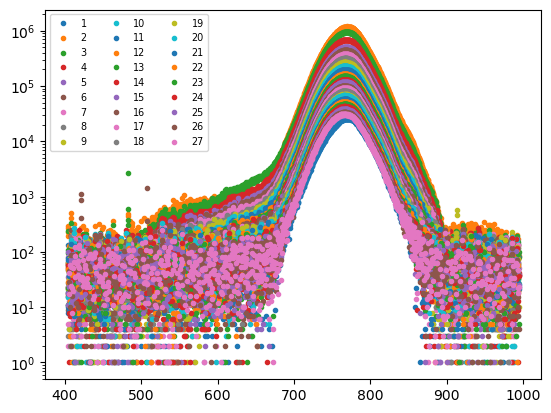

------------------------------------------------
        FILM_250uW_2_sig

        Start Time (ns):          1840.0
        Gate Width (ns):          20
        Gate Step (ns):           20
        Number in Series:         23
        End Time (ns):            2300.0
        Elapsed Time (ns):        440.0
        Central Wavlength (nm):   700.04
------------------------------------------------
Times: [1850. 1870. 1890. 1910. 1930. 1950. 1970. 1990. 2010. 2030. 2050. 2070.
 2090. 2110. 2130. 2150. 2170. 2190. 2210. 2230. 2250. 2270. 2290.]


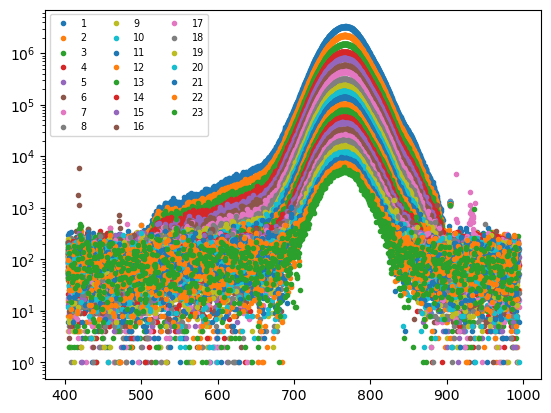

------------------------------------------------
        FILM_250uW_3_sig

        Start Time (ns):          2150.0
        Gate Width (ns):          60
        Gate Step (ns):           60
        Number in Series:         13
        End Time (ns):            2930.0
        Elapsed Time (ns):        720.0
        Central Wavlength (nm):   700.04
------------------------------------------------
Times: [2180. 2240. 2300. 2360. 2420. 2480. 2540. 2600. 2660. 2720. 2780. 2840.
 2900.]


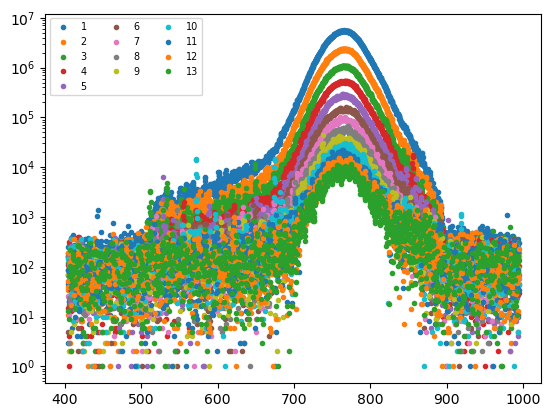

------------------------------------------------
        FILM_250uW_4_sig

        Start Time (ns):          2700.0
        Gate Width (ns):          120
        Gate Step (ns):           120
        Number in Series:         10
        End Time (ns):            3900.0
        Elapsed Time (ns):        1080.0
        Central Wavlength (nm):   700.04
------------------------------------------------
Times: [2760. 2880. 3000. 3120. 3240. 3360. 3480. 3600. 3720. 3840.]


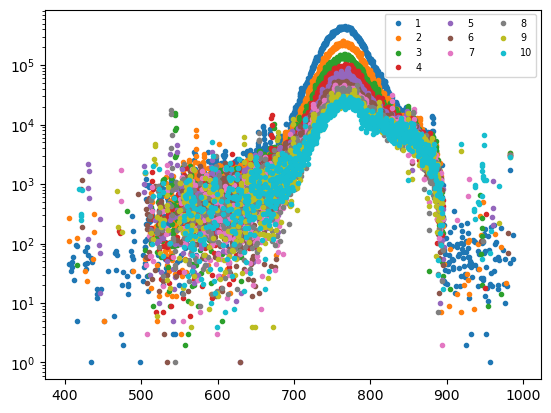

In [6]:
data = []
#Load the data for each file
for f in files:
    data.append(pl.loadASC(f, plot=True))

No. of data points cropped by max: 1


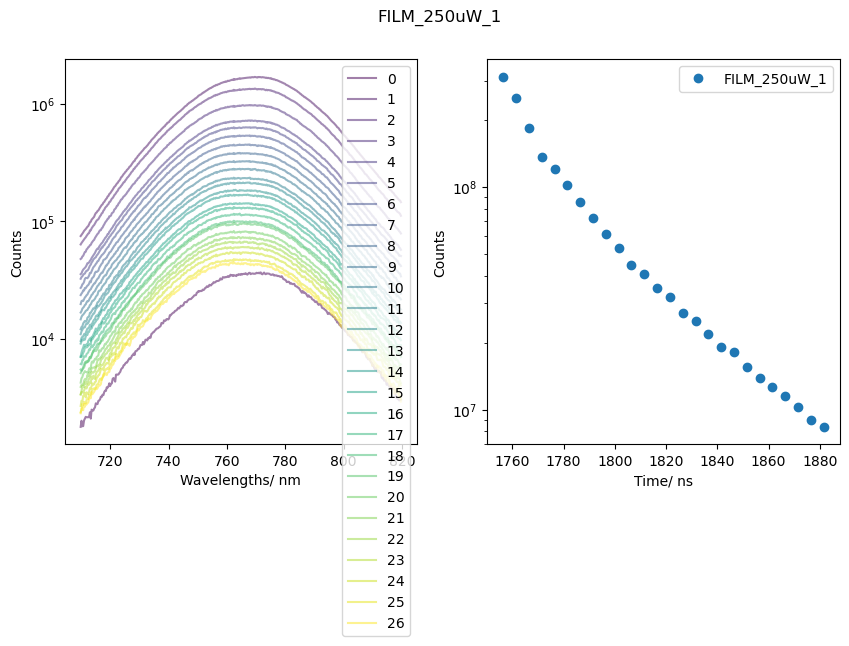

No. of data points cropped by max: 0


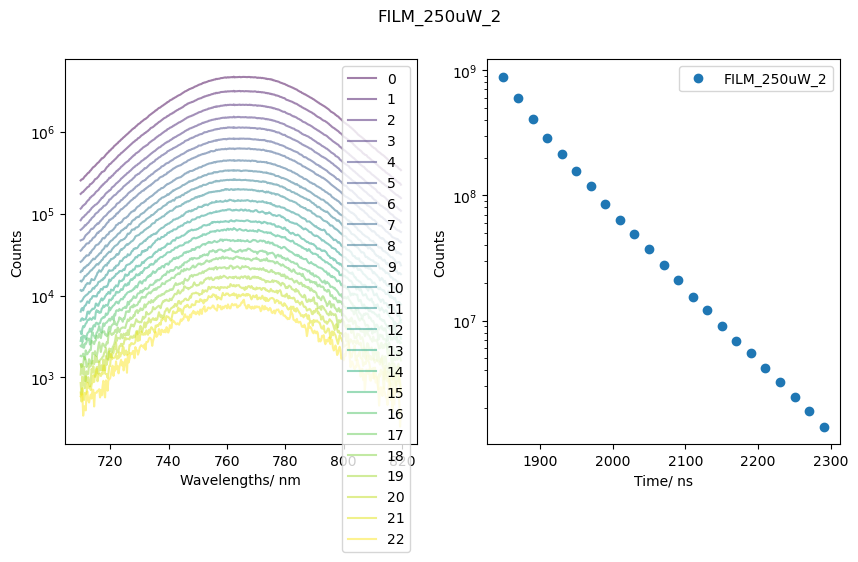

No. of data points cropped by max: 0


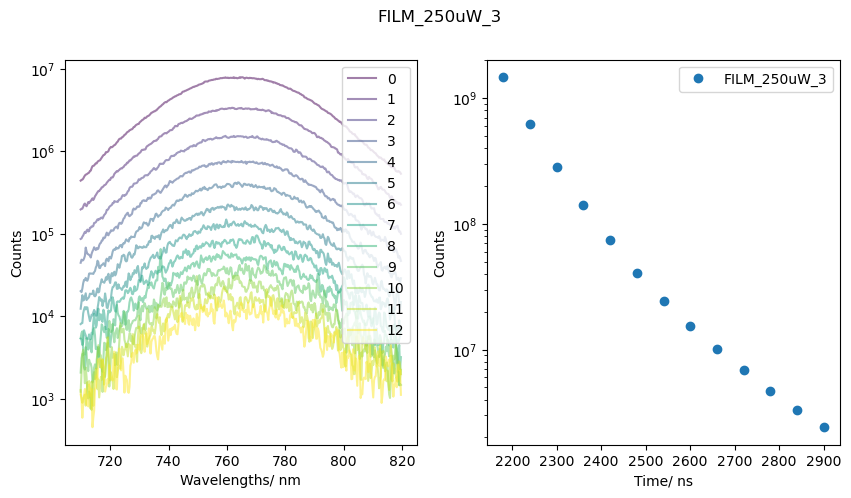

No. of data points cropped by max: 0


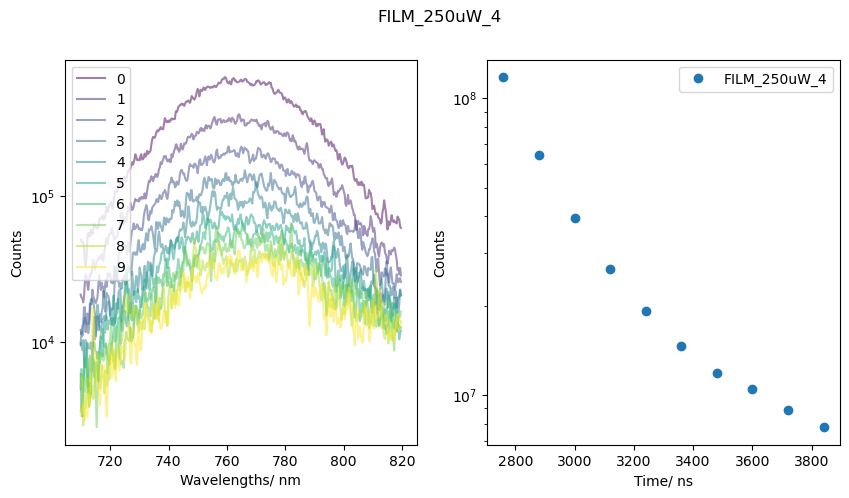

In [7]:
PL_decays = []
#Plots the PL for each timepoint, sums this and plots the PL Decay vs time.
for d,f in zip(data,files):
    PL_decays.append(pl.PLdecay(d,wlmin=710,wlmax=820,label=f[:-8]))


[54 55 55]
done stitch 0 mean=54.666666666666664
[237 220 240]
done stitch 1 mean=232.33333333333334
[21 23 41]
done stitch 2 mean=28.333333333333332


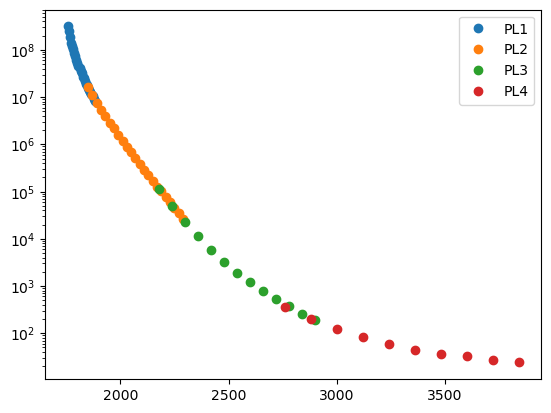

iCCD_TC5_3004_250uW_FILM


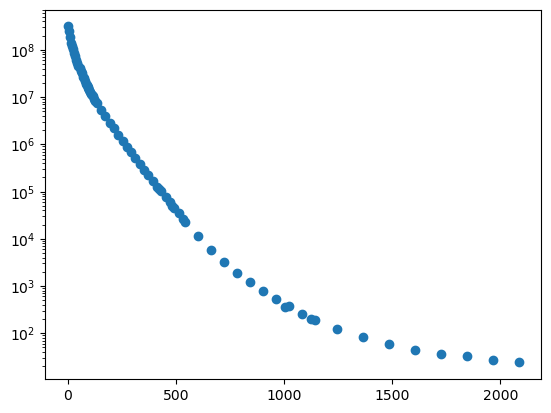

In [8]:
ratios = pl.scaling(PL_decays) #Interpolates the stitches relative to each other, finds the ratio between the interpolated points of stitch A and real data points of stitch B
aligned = pl.plot_aligned(PL_decays,ratios,adjust=[1,1,1,.9],save=True,filename='iCCD_'+series+'_'+date+'_'+fluence+'_'+sample) #plots the aligned data by dividing the real data by the ratio of the interpolated data
#if not perfect stitch, adjust the adjust parameter to scale the data to fit better

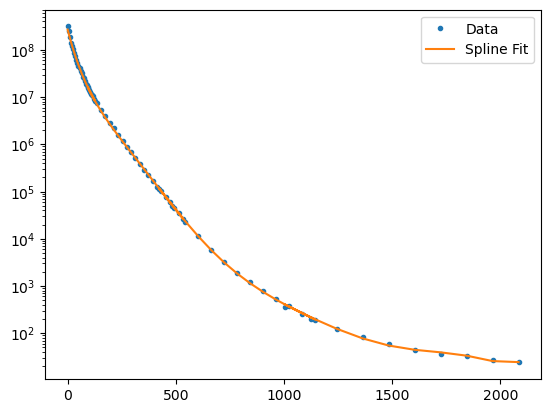

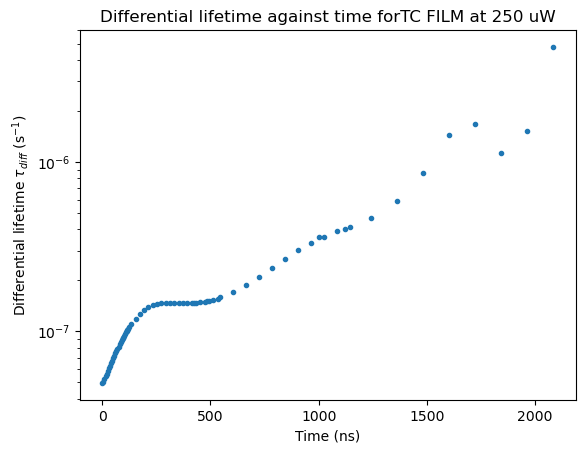

[-0.09363319 -0.09884201 -0.10386322 -0.10870482 -0.11337458 -0.11788002
 -0.12222839 -0.12642673 -0.13048182 -0.13440023 -0.1381883  -0.14185215
 -0.1453977  -0.14883064 -0.15215647 -0.1553805  -0.15850783 -0.16154339
 -0.16449192 -0.16735798 -0.17014595 -0.17286006 -0.17550436 -0.17808274
 -0.18059895 -0.18305656 -0.16650655 -0.17731593 -0.18710969 -0.19610654
 -0.20449008 -0.21241268 -0.21999902 -0.22734943 -0.23454287 -0.24163973
 -0.24868442 -0.25570766 -0.26272863 -0.26975687 -0.27679406 -0.28383553
 -0.29087166 -0.29788916 -0.3048721  -0.31180289 -0.3186631  -0.32543414
 -0.33209789 -0.29438369 -0.31524299 -0.3353841  -0.35434071 -0.37175895
 -0.38744764 -0.4013839  -0.41368826 -0.42458136 -0.43433275 -0.44321028
 -0.45143694 -0.45916014 -0.44033311 -0.45663626 -0.47102682 -0.48320478
 -0.49217231 -0.49754351 -0.50075579 -0.504943   -0.51177014 -0.513069  ]


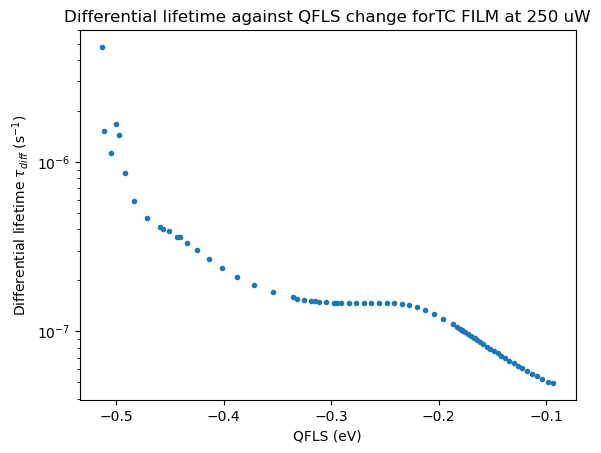

In [9]:
PL_smoothed = pl.spline_function(aligned[0],aligned[1],plot=True)


diff_life = pl.diff_lifetime(PL_smoothed,aligned[0], plot=True,title = 'TC FILM at 250 uW')


qfls_v_time = pl.QFLS_difflifetime(PL_smoothed,aligned[0],title = 'TC FILM at 250 uW')